In [36]:
from pulp import LpMaximize, LpProblem, LpStatus, lpSum, LpVariable, LpMinimize

# Вариант 18 - данные:

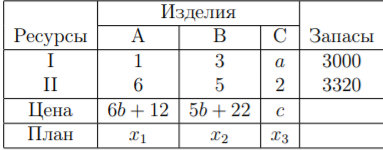

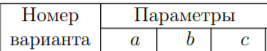


# Прямая задача линейного программирования

### Определяю запасы ресурсов, расходы ресурсов на изделия, цены изделий.

* Запасы ресурсов 1 и 2 типов

In [37]:
invent_1 = 3000 
invent_2 = 3320 

* Параметры по варианту

In [38]:
a = 3 
b = 2
c = 24

* Расход ресурсов на изделие А - 1 и 2 типа

In [39]:
expense_A_1 = 1 
expense_A_2 = 6 

* Расход ресурсов на изделие B - 1 и 2 типа

In [40]:
expense_B_1 = 3 
expense_B_2 = 5 

* Расход ресурсов на изделие C - 1 и 2 типа

In [41]:
expense_C_1 = a 
expense_C_2 = 2 

* Цена для каждого изделия - A, B, C

In [42]:
price_A = 6 * b + 12 
price_B = 5 * b + 22 
price_C = c 

### Задача максимизации:

In [43]:
model = LpProblem(name="resource-allocation", sense=LpMaximize)
model

resource-allocation:
MAXIMIZE
None
VARIABLES

### Определяю переменные решения:

In [44]:
x1 = LpVariable(name="x1",  lowBound=0)
x2 = LpVariable(name="x2",  lowBound=0)
x3 = LpVariable(name="x3",  lowBound=0)

### Задаю ограничения для модели:

In [45]:
constraint_1 = expense_A_1 * x1 + expense_B_1 * x2 + expense_C_1 * x3 <= invent_1

constraint_2 = expense_A_2 * x1 + expense_B_2 * x2 + expense_C_2 * x3 <= invent_2

obj = price_A * x1 + price_B * x2 + price_C * x3

In [46]:
model += (constraint_1, "1")
model += (constraint_2, "2")
model += (obj)
model

resource-allocation:
MAXIMIZE
24*x1 + 32*x2 + 24*x3 + 0
SUBJECT TO
1: x1 + 3 x2 + 3 x3 <= 3000

2: 6 x1 + 5 x2 + 2 x3 <= 3320

VARIABLES
x1 Continuous
x2 Continuous
x3 Continuous

### Результаты максимизации:

In [47]:
status = model.solve()

In [48]:
print(f"Статус решения: {model.status}, {LpStatus[model.status]}")
F = model.objective.value()
print(f"Оптимальное значение целевой функции: {int(F)}")

x1_total = model.variables()[0].value()
x2_total = model.variables()[1].value()
x3_total = model.variables()[2].value()

print(f"Оптимальный план: (x1 = {int(x1_total)}, x2 = {int(x2_total)}, x3 = {int(x3_total)})")

for name, c in list(model.constraints.items()):
    print(f"{name} : {c}\tFor dual task: {c.pi}")

Статус решения: 1, Optimal
Оптимальное значение целевой функции: 27960
Оптимальный план: (x1 = 247, x2 = 0, x3 = 917)
1 : x1 + 3*x2 + 3*x3 <= 3000	For dual task: 6.0
2 : 6*x1 + 5*x2 + 2*x3 <= 3320	For dual task: 3.0


# Вывод:
##### Оптимальный план представлен в следующем виде -  производство 247 изделий А, 0 изделий B и 917 изделий C, прибыль же составит 27960 единиц.

### Реальный расход ресурсов

In [49]:
result_1 = x1_total * expense_A_1 + x2_total * expense_B_1 + x3_total * expense_C_1
result_2 = x1_total * expense_A_2 + x2_total * expense_B_2 + x3_total * expense_C_2

print(f"Реальный расход ресурса 1 = {int(res_1)}")
print(f"Реальный расход ресурса 2 = {int(res_2)}")

Реальный расход ресурса 1 = 3000
Реальный расход ресурса 2 = 3320


### Теперь следует определить дефицит ресурсов

In [50]:
deficit_1 = abs(result_1 - invent_1)
deficit_2 = abs(result_2 - invent_2)

print(f"Дефицит ресурса 1 = {int(deficit_1)}")
print(f"Дефицит ресурса 2 = {int(deficit_2)}")

Дефицит ресурса 1 = 0
Дефицит ресурса 2 = 0


# Двойственная задача линейного программирования

### Задача минимизации

In [51]:
model_dual = LpProblem(name="resource-allocation", sense=LpMinimize) 
model_dual

resource-allocation:
MINIMIZE
None
VARIABLES

### Определяю переменные решения

In [52]:
y1 = LpVariable(name="y1",  lowBound=0)
y2 = LpVariable(name="y2",  lowBound=0)

### Задаю ограничения для модели

In [53]:
constraint_1_dual = expense_A_1 * y1 + expense_A_2 * y2 >= price_A

constraint_2_dual = expense_B_1 * y1 + expense_B_2 * y2 >= price_B

constraint_3_dual = expense_C_1 * y1 + expense_C_2 * y2 >= price_C

obj_dual = invent_1 * y1 + invent_2 * y2

In [54]:
model_dual += (constraint_1_dual, "1")
model_dual += (constraint_2_dual, "2")
model_dual += (constraint_3_dual, "3")

model_dual += (obj_dual)
model_dual

resource-allocation:
MINIMIZE
3000*y1 + 3320*y2 + 0
SUBJECT TO
1: y1 + 6 y2 >= 24

2: 3 y1 + 5 y2 >= 32

3: 3 y1 + 2 y2 >= 24

VARIABLES
y1 Continuous
y2 Continuous

### Результаты минимизации

In [55]:
status_dual = model_dual.solve()

In [56]:
print(f"Статус решения: {model_dual.status}, {LpStatus[model_dual.status]}")
F = model_dual.objective.value()
print(f"Оптимальное значение целевой функции: {int(F)}")

y1_total = model_dual.variables()[0].value()
y2_total = model_dual.variables()[1].value()

print(f"Оптимальный план: (y1 = {y1_total}, y2 = {y2_total})")

Статус решения: 1, Optimal
Оптимальное значение целевой функции: 27960
Оптимальный план: (y1 = 6.0, y2 = 3.0)


# Вывод:
##### Оптимальная цена первого ресурса составляет 6 единиц, второго ресурса - 3 единиц, итоговая прибыль же составит 27960 единиц.